### _Boston House Price Prediciton_
#### _Linear regression using Gradient Descent_

In [1]:

#! pip install kaggle


In [2]:
#! kaggle --version

In [3]:
#! kaggle datasets download arunjathari/bostonhousepricedata

In [4]:
! ls -la

total 628
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 30 18:13 .
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 27 16:17 ..
drwxrwxrwx 1 aswinpushkar11 aswinpushkar11   4096 Dec 30 23:38 .git
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  41359 Dec 30 22:42 Boston-house-price-data.csv
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  12616 Sep 22  2020 bostonhousepricedata.zip
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11  27765 Dec 27 23:21 output.png
-rwxrwxrwx 1 aswinpushkar11 aswinpushkar11 552116 Dec 31 11:07 price_prediction.ipynb


In [5]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import random
%matplotlib inline


In [6]:
#Unzipping the dataset 
import zipfile

zip_path='/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/bostonhousepricedata.zip'
tgt_path='/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/'
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(tgt_path)

In [7]:
df=pd.read_csv('/mnt/c/Personal/VS Code/Python/BostonHousePricePrediciton/Boston-house-price-data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### _Abbreviaitons of columns_ ###


- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
input_data = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
input_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [12]:
target_data = df[['MEDV']]
target_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


Text(0, 0.5, 'Age')

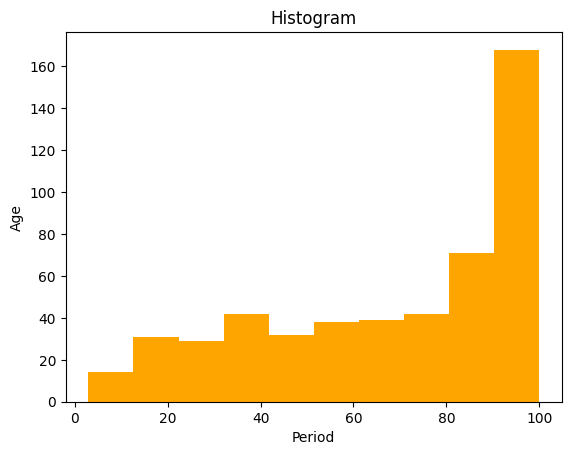

In [13]:
plt.hist(df['AGE'],color='Orange')
plt.title('Histogram')
plt.xlabel('Period')
plt.ylabel('Age')

In [14]:
# To find the number of unique values

df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [15]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [16]:
#CHAS can be converted to a categorical column
df['CHAS'].unique()

array([0, 1])

In [17]:
df['CHAS']=pd.Categorical(df['CHAS'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), int64(1)
memory usage: 52.1 KB


In [19]:
def Overview(dataframe):
    print('Shape of the DataFrame:',dataframe.shape)
    print('Number of columns in the dataframe:',dataframe.shape[0])
    print('Number of columns in the dataframe:',dataframe.shape[1])
    print('Categorical Columns:',dataframe.select_dtypes(include = ['category']).columns)
    print('Numerical Columns:',dataframe.select_dtypes(include = ['float64']).columns)


Overview(df)

Shape of the DataFrame: (506, 14)
Number of columns in the dataframe: 506
Number of columns in the dataframe: 14
Categorical Columns: Index(['CHAS'], dtype='object')
Numerical Columns: Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')


In [20]:
#correlation_matrix
corr_matrix = df.corr().round(2)
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
RAD       -0.38
AGE       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: MEDV, dtype: float64

<Axes: >

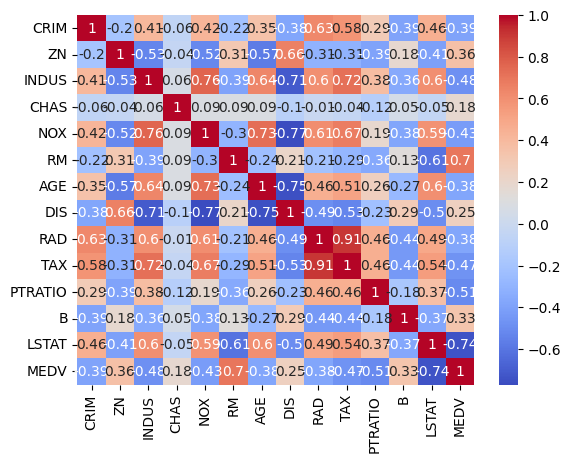

In [21]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [24]:
#splitting training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data,target_data,test_size=0.1,random_state=42)

In [25]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (455, 13)
x_test: (51, 13)
y_train: (455, 1)
y_test: (51, 1)


In [26]:
input_data.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Name: 0, dtype: float64

In [27]:
x_train.reset_index(inplace=True)
x_train.drop(columns='index',axis=1,inplace=True)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216.0,14.9,392.23,4.59
1,1.23247,0.0,8.14,0,0.5380,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72
2,0.11432,0.0,8.56,0,0.5200,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67
3,0.54050,20.0,3.97,0,0.5750,7.470,52.6,2.8720,5,264.0,13.0,390.30,3.16
4,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
451,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
452,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
453,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [28]:
y_train.reset_index(inplace=True)
y_train.drop(columns='index',axis=1,inplace=True)
y_train

,MEDV
0,35.4
1,15.2
2,26.5
3,43.5
4,21.2
...,...
450,19.5
451,21.1
452,24.5
453,13.4


In [29]:
x_test.reset_index(inplace=True)
x_test.drop(columns='index',axis=1,inplace=True)
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,4.05,0,0.5100,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0,0.6090,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0,0.4130,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0,0.7130,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0,0.4370,6.279,74.5,4.0522,5,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0,0.5440,5.914,83.2,3.9986,4,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0,0.6240,6.174,93.6,1.6119,4,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0,0.5320,6.229,90.7,3.0993,24,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0,0.5850,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33


In [30]:
y_test.reset_index(inplace=True)
y_test.drop(columns='index',axis=1,inplace=True)
y_test

,MEDV
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1
5,20.0
6,17.8
7,14.0
8,19.6
9,16.8


In [31]:
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values


In [32]:
x_train

array([[3.70500e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.92230e+02, 4.59000e+00],
       [1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [1.14320e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.95580e+02, 7.67000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]], shape=(455, 13))

In [33]:
y_test

array([[23.6],
       [32.4],
       [13.6],
       [22.8],
       [16.1],
       [20. ],
       [17.8],
       [14. ],
       [19.6],
       [16.8],
       [21.5],
       [18.9],
       [ 7. ],
       [21.2],
       [18.5],
       [29.8],
       [18.8],
       [10.2],
       [50. ],
       [14.1],
       [25.2],
       [29.1],
       [12.7],
       [22.4],
       [14.2],
       [13.8],
       [20.3],
       [14.9],
       [21.7],
       [18.3],
       [23.1],
       [23.8],
       [15. ],
       [20.8],
       [19.1],
       [19.4],
       [34.7],
       [19.5],
       [24.4],
       [23.4],
       [19.7],
       [28.2],
       [50. ],
       [17.4],
       [22.6],
       [15.1],
       [13.1],
       [24.2],
       [19.9],
       [24. ],
       [18.9]])

In [34]:
#Initialsing values for w,b

array=[random.random() for _ in range(13)]
w_init=np.array(array)
b_init = 785.1811367994083
print(w_init)
print(b_init)
print(f'Shape of w:{w_init.shape},Shape of b:{type(b_init)}')


[0.65506795 0.36318473 0.68339085 0.74741133 0.31736686 0.74227935
 0.24102868 0.74979142 0.1500145  0.76690044 0.79208082 0.33289071
 0.74381683]
785.1811367994083
Shape of w:(13,),Shape of b:<class 'float'>


In [35]:
print(w_init.shape)


(13,)


In [36]:
#compute_cost function
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        y_pred = np.dot(x[i],w)+b
        cost+=((y_pred -y[i])**2)
    cost/=(2*m)
    return cost
    


In [37]:
#cost using pre chosen parameters
cost=compute_cost(x_train,y_train,w_init,b_init)
print(f'cost at optimal w:{cost}')

cost at optimal w:[799389.54005966]


In [38]:
dj_dw=np.zeros(13)
print(type(dj_dw))
dj_dw

<class 'numpy.ndarray'>


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
#compute gradient function
def compute_gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros(n)
    dj_db=0.
    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw,dj_db


In [40]:
m,n=x_train.shape
dj_dw=np.zeros((n,1))
print('dj_dw:',dj_dw.shape)
dj_db=0.
print('dj_db:',type(dj_db))
for i in range(m):                             
    err = (np.dot(x_train[i], w_init) + b_init) - y_train[i]  
    for j in range(n):                         
        dj_dw[j]+= err * x_train[i,j]
        
    dj_db += err                      
dj_dw = dj_dw / m 
print('dj_dw',dj_dw.shape)                               
dj_db = dj_db / m                                
        

dj_dw: (13, 1)
dj_db: <class 'float'>
dj_dw (13, 1)


In [41]:
dj_dw,dj_db=compute_gradient(x_train,y_train,w_init,b_init)
print(f'dj_dw at initial w,b:{dj_dw}')
print(f'dj_db at initial w,b:{dj_db}')

dj_dw at initial w,b:[5.31010171e+03 1.39692491e+04 1.45503240e+04 8.52086248e+01
 7.08058565e+02 7.88814721e+03 8.77633673e+04 4.66331979e+03
 1.30100755e+04 5.34750949e+05 2.32973176e+04 4.43096600e+05
 1.63122213e+04]
dj_db at initial w,b:[1257.36157198]


/tmp/ipykernel_240001/2798566434.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * x[i, j]


In [42]:
#model function

def model(x,y,w_init,b_init,compute_cost,compute_gradient,num_iters,learning_rate):
    
    J_hist=[]
    w=copy.deepcopy(w_init)
    b=b_init

    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w-=(dj_dw*learning_rate)
        b-=(dj_db*learning_rate)

        if i<100000:
            J_hist.append(compute_cost(x,y,w,b))
    
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_hist[-1]}")
    return w,b,J_hist

In [43]:
w_in=np.zeros_like(w_init)
print('w_in:',w_in.shape)
b_in=0
learning_rate=5.0e-7
num_iters=1000

w_in: (13,)


In [44]:
w_final,b_final,J_hist =model(x_train,y_train,w_in,b_in,compute_cost,compute_gradient,num_iters,learning_rate)
w_final,b_final,J_hist

Iteration 0: Cost [233.87292604]


/tmp/ipykernel_240001/2798566434.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * x[i, j]


Iteration 100: Cost [44.0646765]
Iteration 200: Cost [41.60938557]
Iteration 300: Cost [41.23355359]
Iteration 400: Cost [41.05321115]
Iteration 500: Cost [40.89659503]
Iteration 600: Cost [40.74770804]
Iteration 700: Cost [40.60474817]
Iteration 800: Cost [40.4672297]
Iteration 900: Cost [40.33480981]


(array([-0.00600637,  0.02686716, -0.0038678 ,  0.00021233,  0.00013388,
         0.00483673,  0.00439077,  0.00235049, -0.00158477,  0.00033619,
         0.00417527,  0.06022713, -0.0121229 ]),
 array([0.00044683]),
 [array([233.87292604]),
  array([185.9637581]),
  array([151.63893003]),
  array([127.00183095]),
  array([109.27464898]),
  array([96.47711507]),
  array([87.19749416]),
  array([80.42933514]),
  array([75.45509746]),
  array([71.76319369]),
  array([68.98885298]),
  array([66.8719653]),
  array([65.22703043]),
  array([63.92173595]),
  array([62.86168646]),
  array([61.97951762]),
  array([61.2271361]),
  array([60.57018765]),
  array([59.98411371]),
  array([59.45134021]),
  array([58.95927363]),
  array([58.49887239]),
  array([58.06362847]),
  array([57.64884137]),
  array([57.25110056]),
  array([56.86791648]),
  array([56.49745744]),
  array([56.13836213]),
  array([55.7896058]),
  array([55.45040495]),
  array([55.12014929]),
  array([54.79835326]),
  array([54.48

In [45]:
print(f'The final parameters are w:{w_final},b:{b_final}')

The final parameters are w:[-0.00600637  0.02686716 -0.0038678   0.00021233  0.00013388  0.00483673
  0.00439077  0.00235049 -0.00158477  0.00033619  0.00417527  0.06022713
 -0.0121229 ],b:[0.00044683]


In [46]:
for i in range(5):
    print(f'Prediction :{np.dot(x_train[i],w_final)+b_final},target_values:{y_train[i]}')

Prediction :[24.42826196],target_values:[35.4]
Prediction :[24.26508023],target_values:[15.2]
Prediction :[24.25939657],target_values:[26.5]
Prediction :[24.39655066],target_values:[43.5]
Prediction :[23.72366128],target_values:[21.2]


The value we see here are not very close to target values for gradient descent without normalisation.Hence following measure have been taken to improve the performance of the linear regression algorithm.
- Normalising the input values for `x_train`.
- Providing wieghts according to correlation matrix

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#minmaxscaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)


In [50]:
x_train_scaled.shape

(455, 13)

In [51]:
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
x_test_scaled = scaler.fit_transform(x_test)
y_test_scaled = scaler.fit_transform(y_test).reshape(-1,1)

Applying gradient descent to scaled data.The range of the scaled data is between [0,1]

In [69]:
w_final_scaled,b_final_scaled,J_hist_scaled =model(x_train_scaled,y_train_scaled,w_in,b_in,compute_cost,compute_gradient,num_iters,learning_rate)
w_final_scaled,b_final_scaled,J_hist_scaled

/tmp/ipykernel_240001/2798566434.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * x[i, j]


Iteration 0: Cost [0.09869602]
Iteration 100: Cost [0.09866935]
Iteration 200: Cost [0.09864269]
Iteration 300: Cost [0.09861604]
Iteration 400: Cost [0.0985894]
Iteration 500: Cost [0.09856277]
Iteration 600: Cost [0.09853615]
Iteration 700: Cost [0.09850954]
Iteration 800: Cost [0.09848294]
Iteration 900: Cost [0.09845635]


(array([4.16210987e-06, 3.12169677e-05, 6.24105068e-05, 1.80681678e-05,
        5.83098880e-05, 1.12722595e-04, 1.21534163e-04, 5.29787795e-05,
        5.79786831e-05, 6.73801199e-05, 1.09528807e-04, 1.83992691e-04,
        4.35011294e-05]),
 array([0.00019643]),
 [array([0.09869602]),
  array([0.09869575]),
  array([0.09869549]),
  array([0.09869522]),
  array([0.09869495]),
  array([0.09869469]),
  array([0.09869442]),
  array([0.09869415]),
  array([0.09869388]),
  array([0.09869362]),
  array([0.09869335]),
  array([0.09869308]),
  array([0.09869282]),
  array([0.09869255]),
  array([0.09869228]),
  array([0.09869202]),
  array([0.09869175]),
  array([0.09869148]),
  array([0.09869122]),
  array([0.09869095]),
  array([0.09869068]),
  array([0.09869042]),
  array([0.09869015]),
  array([0.09868988]),
  array([0.09868962]),
  array([0.09868935]),
  array([0.09868908]),
  array([0.09868882]),
  array([0.09868855]),
  array([0.09868828]),
  array([0.09868802]),
  array([0.09868775]),


In [56]:
x_train_original = scaler.inverse_transform(x_train_scaled)
y_train_original = scaler.inverse_transform(y_train_scaled)

In [58]:
x_train_original

array([[ 7.01352825, 15.6       , 11.12481481, ..., 17.5212766 ,
        49.49364567, 10.39348786],
       [ 7.59130405,  7.        , 18.78518519, ..., 45.42553191,
        50.        , 27.15921634],
       [ 7.05087474,  7.        , 19.45407407, ..., 44.96808511,
        49.85687629, 14.04801325],
       ...,
       [ 7.00287578, 41.4       ,  9.02259259, ..., 27.12765957,
        49.35377477, 12.05463576],
       [12.38971602,  7.        , 34.64740741, ..., 41.76595745,
        18.87601493, 32.55794702],
       [ 7.1061864 ,  7.        , 19.45407407, ..., 44.96808511,
        14.64193857, 17.56015453]], shape=(455, 13))

In [60]:
y_train_scaled

array([[0.67555556],
       [0.22666667],
       [0.47777778],
       [0.85555556],
       [0.36      ],
       [0.29777778],
       [0.52222222],
       [0.42      ],
       [0.3       ],
       [0.44444444],
       [0.67555556],
       [0.58888889],
       [0.33777778],
       [0.42444444],
       [0.33333333],
       [0.18      ],
       [0.44      ],
       [0.57333333],
       [0.17111111],
       [0.33333333],
       [0.41555556],
       [0.12888889],
       [0.34666667],
       [0.35111111],
       [0.        ],
       [0.33555556],
       [0.96666667],
       [0.13111111],
       [0.04444444],
       [0.35333333],
       [0.27111111],
       [0.35333333],
       [0.10444444],
       [0.32      ],
       [0.53333333],
       [0.25333333],
       [0.44444444],
       [0.44444444],
       [0.26888889],
       [0.40444444],
       [0.12      ],
       [0.32444444],
       [0.27111111],
       [0.5       ],
       [0.4       ],
       [1.        ],
       [0.28666667],
       [0.102

In [59]:
y_train_original

array([[36.04888889],
       [16.74666667],
       [27.54444444],
       [43.78888889],
       [22.48      ],
       [19.80444444],
       [29.45555556],
       [25.06      ],
       [19.9       ],
       [26.11111111],
       [36.04888889],
       [32.32222222],
       [21.52444444],
       [25.25111111],
       [21.33333333],
       [14.74      ],
       [25.92      ],
       [31.65333333],
       [14.35777778],
       [21.33333333],
       [24.86888889],
       [12.54222222],
       [21.90666667],
       [22.09777778],
       [ 7.        ],
       [21.42888889],
       [48.56666667],
       [12.63777778],
       [ 8.91111111],
       [22.19333333],
       [18.65777778],
       [22.19333333],
       [11.49111111],
       [20.76      ],
       [29.93333333],
       [17.89333333],
       [26.11111111],
       [26.11111111],
       [18.56222222],
       [24.39111111],
       [12.16      ],
       [20.95111111],
       [18.65777778],
       [28.5       ],
       [24.2       ],
       [50

In [61]:
w_final,b_final

(array([4.16210987e-06, 3.12169677e-05, 6.24105068e-05, 1.80681678e-05,
        5.83098880e-05, 1.12722595e-04, 1.21534163e-04, 5.29787795e-05,
        5.79786831e-05, 6.73801199e-05, 1.09528807e-04, 1.83992691e-04,
        4.35011294e-05]),
 array([0.00019643]))

In [57]:
for i in range(5):
    print(f'Prediction :{np.dot(x_train_original[i],w_final)+b_final},target_values:{y_train_original[i]}')

Prediction :[0.02306276],target_values:[36.04888889]
Prediction :[0.02994245],target_values:[16.74666667]
Prediction :[0.02903978],target_values:[27.54444444]
Prediction :[0.02381357],target_values:[43.78888889]
Prediction :[0.03235513],target_values:[22.48]


In [118]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train_scaled,y_train_scaled)


LinearRegression()

In [90]:
w_linalg=linear_reg.coef_
b_linalg=linear_reg.intercept_
print('w_linalg:',w_linalg)
print('b_linalg:',b_linalg)

w_linalg: [[-0.23702084  0.0886966   0.01277631  0.06168115 -0.20072336  0.43558836
   0.00986269 -0.35938992  0.15940432 -0.13753242 -0.19793399  0.09102655
  -0.44301085]]
b_linalg: [0.47850572]


In [81]:
y_pred=linear_model.predict(x_train_scaled)
y_pred.shape

(455, 1)

In [84]:
for i in range(5):
    print(f'Prediction :{y_pred_orig[i]} Target_values:{y_train_orig[i]}')

Prediction :[35.10090488] Target_values:[36.04888889]
Prediction :[17.43580757] Target_values:[16.74666667]
Prediction :[26.98625798] Target_values:[27.54444444]
Prediction :[39.82465428] Target_values:[43.78888889]
Prediction :[23.80515558] Target_values:[22.48]


In [96]:
score = linear_reg.score(x_train_scaled,y_train_scaled)
score
print(f'Score R^2 of the Model:{score}')

Score R^2 of the Model:0.7375152736886281


In [100]:
ridge=linear_model.Ridge(alpha=0.5)
ridge.fit(x_train_scaled,y_train_scaled)

Ridge(alpha=0.5)

In [101]:
w_ridge = ridge.coef_
b_ridge = ridge.intercept_
print('w_ridge:',w_ridge)
print('b_ridge:',b_ridge)

w_ridge: [[-0.19537978  0.0763748   0.00108488  0.06452968 -0.17816342  0.42162315
   0.00957813 -0.32101223  0.13894677 -0.12158018 -0.19556521  0.09094146
  -0.43538396]]
b_ridge: [0.46993683]


In [108]:
y_pred_ridge = ridge.predict(x_train)
y_pred_ridge_org  = scaler.inverse_transform(y_pred_ridge)
y_pred_ridge

array([[ 8.71651204e+00],
       [-1.05985130e+01],
       [-1.44547934e+01],
       [ 4.69893804e+00],
       [-4.93078382e+01],
       [-5.06395282e+01],
       [ 9.68131504e+00],
       [ 6.79034570e-01],
       [-1.30089331e+01],
       [-2.44716734e+00],
       [ 1.13742754e+01],
       [-4.48019203e+00],
       [-1.80263685e+01],
       [-1.70184167e+01],
       [-8.37703619e+00],
       [-5.16109336e+01],
       [-6.21769974e-01],
       [ 7.67328696e+00],
       [-8.69281970e+01],
       [ 4.01077241e-03],
       [-4.74382380e+01],
       [-6.94312993e+01],
       [-6.80291400e+00],
       [-1.85286024e+01],
       [-6.31601406e+01],
       [-1.66915358e+01],
       [ 1.41417112e+01],
       [-5.41818000e+01],
       [-6.59499301e+01],
       [-1.07732254e+01],
       [-6.26927916e+01],
       [-3.24746590e+00],
       [-5.60871370e+01],
       [-6.23740875e+00],
       [-7.70027276e+00],
       [-6.32502619e+01],
       [-2.70500875e+00],
       [ 1.76411992e+00],
       [-2.3

In [129]:
ridge.score(x_train_scaled,y_train_scaled)

0.7364951930166131